# Звіт до лабораторної роботи №4(продовження) (Сенчак Павло ОІ-21сп)

# Random Over-sampling

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import RandomOverSampler

## Create data

In [70]:
df = pd.read_csv("new_variant_1.csv")

In [71]:
X = df.drop(columns='Status')
y = df['Status']

# display size
X.shape, y.shape

((144148, 31), (144148,))

In [72]:
X.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type
0,24890,0,3,0,0,0,0,0,1,-1.238773,...,0,-1.274916,3,0.502424,0,2,1,1.474201,3,1
1,24891,0,2,0,1,0,0,0,0,-0.696280,...,0,-0.391089,2,-1.275484,1,5,1,0.001173,0,1
2,24892,0,2,1,0,0,0,0,1,0.509260,...,0,0.836448,3,1.158352,0,2,1,0.397419,3,1
3,24893,0,2,0,0,3,0,0,1,0.810645,...,0,1.491135,3,-0.973412,0,4,0,-0.215114,0,1
4,24894,0,1,1,0,0,0,0,1,2.257294,...,0,1.098323,1,-0.843953,1,2,0,1.080402,0,1


## Random Over-sampling

In [73]:
# Перевірка балансу класів до балансування
print("Баланс класів до балансування:")
print(y.value_counts())

# Застосування Random Over-sampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Перевірка балансу класів після балансування
print("Баланс класів після балансування:")
print(y_res.value_counts())


Баланс класів до балансування:
Status
Yes    108729
No      35419
Name: count, dtype: int64
Баланс класів після балансування:
Status
No     108729
Yes    108729
Name: count, dtype: int64


In [74]:
# size of undersampled data

X_res.shape, y_res.shape

((217458, 31), (217458,))

In [75]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(Status
 Yes    108729
 No      35419
 Name: count, dtype: int64,
 Status
 No     108729
 Yes    108729
 Name: count, dtype: int64)

# SMOTE

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

## Create data

In [77]:
df = pd.read_csv("new_variant_1.csv")

In [78]:
X = df.drop(columns='Status')
y = df['Status']

# display size
X.shape, y.shape

((144148, 31), (144148,))

## SMOTE

In [79]:
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    n_jobs=4
)

X_res, y_res = sm.fit_resample(X, y)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [80]:
# size of original data

X.shape, y.shape

((144148, 31), (144148,))

In [81]:
# size of undersampled data

X_res.shape, y_res.shape

((217458, 31), (217458,))

In [82]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(Status
 Yes    108729
 No      35419
 Name: count, dtype: int64,
 Status
 No     108729
 Yes    108729
 Name: count, dtype: int64)

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

## Create data

In [84]:
df = pd.read_csv("new_variant_1.csv")

In [85]:
X = df.drop(columns='Status')
y = df['Status']

# display size
X.shape, y.shape

((144148, 31), (144148,))

## Random Undersampling

In [86]:
rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only the majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [87]:
# size of original data

X.shape, y.shape

((144148, 31), (144148,))

In [88]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((70838, 31), (70838,))

In [89]:
# number of minority class observations

y.value_counts()

Status
Yes    108729
No      35419
Name: count, dtype: int64

## Changing the balancing ratio

In [90]:
# now, I will resample the data, so that I obtain
# twice as many observations from the majority as
# those from the minority

rus = RandomUnderSampler(
    sampling_strategy= 0.5,  # remember balancing ratio = x min / x maj
    random_state=0,  
    replacement=False # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [91]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((106257, 31), (106257,))

In [92]:
# see that we have twice as many of the majority now

y_resampled.value_counts()

Status
Yes    70838
No     35419
Name: count, dtype: int64

In [93]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((106257, 31), (106257,))

In [96]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

In [97]:
# create data

X, y = make_data(sep=2)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

In [98]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [99]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((994, 2), (994,))

In [100]:
# number of minority class observations

y.value_counts()

0    983
1     17
Name: count, dtype: int64

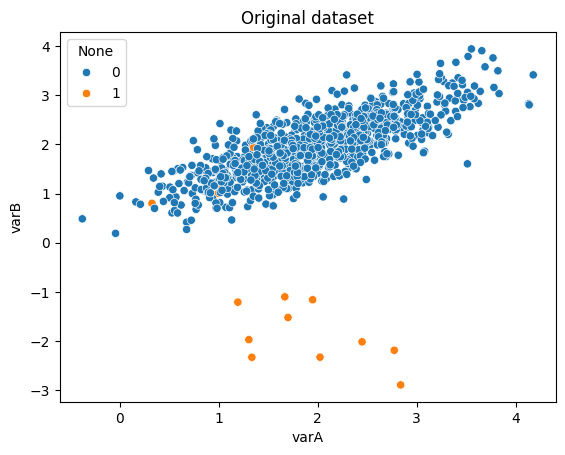

In [101]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

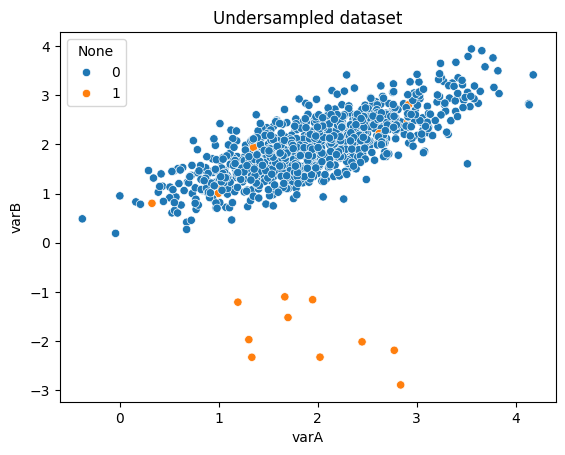

In [102]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

### Partially separated classes

In [103]:
# create data
X, y = make_data(sep=0.5)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

In [104]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [105]:
# undersampled data

X_resampled.shape, y_resampled.shape

((988, 2), (988,))

Note that more samples were excluded in the final training set, compared to the previous case where classes were more separated. This is because there are more Tomek Links, as the classes are now not so separated.

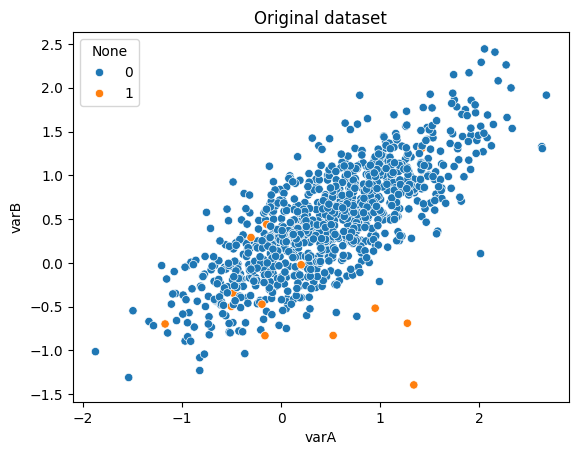

In [106]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

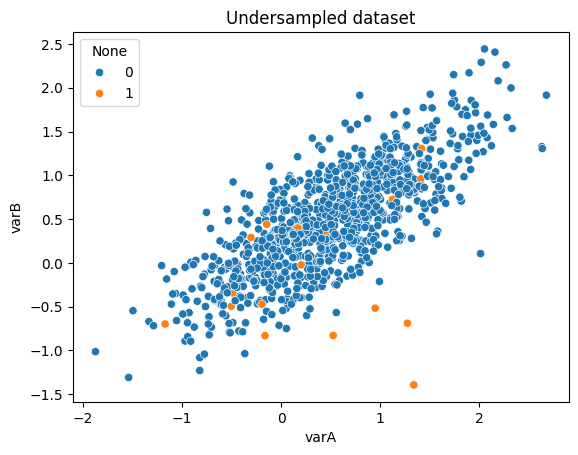

In [107]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

In [108]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)

from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.datasets import fetch_datasets

from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

from imblearn.ensemble import (
    BalancedBaggingClassifier,
    BalancedRandomForestClassifier,
    RUSBoostClassifier,
    EasyEnsembleClassifier,
)

In [109]:
! pip install imbalanced-learn==0.10.1

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [110]:
# just re-sampling methods (no classifier)

resampling_dict = {
    
    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0
    ),

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4,
    ),
}

In [111]:
# ensemble methods (with or without resampling)

ensemble_dict = {

    # balanced random forests (bagging)
    'balancedRF': BalancedRandomForestClassifier(
        n_estimators=20,
        criterion='gini',
        max_depth=3,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),

    # bagging of Logistic regression, no resampling
    'bagging': BaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        n_jobs=4,
        random_state=2909,
    ),

    # bagging of Logistic regression, with resampling
    'balancedbagging': BalancedBaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        max_samples=1.0,  # The number of samples to draw from X to train each base estimator
        max_features=1.0,  # The number of features to draw from X to train each base estimator
        bootstrap=True,
        bootstrap_features=False,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),


    # bagging + boosting + under-sammpling
    'easyEnsemble': EasyEnsembleClassifier(
        n_estimators=20,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),
}

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
datasets_ls = [
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

In [ ]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=20, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
    pred = rf.predict(X_train)
    print(
        'Random Forests metrics: ',(classification_report(y_train, pred)))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    
    pred_ = rf.predict(X_test)
    print(
        'Random Forests metrics: ',(classification_report(y_test, pred_)))

    return roc_auc_score(y_test, pred[:, 1])

In [ ]:
# function to train random forests and evaluate the peadaormance

def run_adaboost(X_train, X_test, y_train, y_test):

    ada = AdaBoostClassifier(n_estimators=20, random_state=2909)
    
    ada.fit(X_train, y_train)

    print('Train set')
    pred = ada.predict_proba(X_train)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
    
    pred = ada.predict(X_train)
    print(
        'AdaBoost metrics: ', (classification_report(y_train, pred)))    

    print('Test set')
    pred = ada.predict_proba(X_test)
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    pred_ = ada.predict(X_test)
    print(
        'AdaBoost metrics: ',(classification_report(y_test, pred_)))    


    return roc_auc_score(y_test, pred[:, 1])

In [ ]:
# function to train random forests and evaluate the peensembleormance

def run_ensemble(ensemble, X_train, X_test, y_train, y_test):
    
    ensemble.fit(X_train, y_train)

    print('Train set')
    pred = ensemble.predict_proba(X_train)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))
    
    pred = ensemble.predict(X_train)
    print(
        'ensembleBoost metrics: ', (classification_report(y_train, pred)))    


    print('Test set')
    pred = ensemble.predict_proba(X_test)
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
    
    pred_ = ensemble.predict(X_test)
    print(
        'ensembleBoost metrics:' ,(classification_report(y_test, pred_)))    


    return roc_auc_score(y_test, pred[:, 1])

In [ ]:
# to save the results
results_dict = {}

for dataset in datasets_ls:
    
    results_dict[dataset] = {}    
    print(dataset)
    
    # load dataset
    data = fetch_datasets()[dataset]
    
    # separate train and test
    X_train, X_test, y_train, y_test = train_test_split(
    data.data,  
    data.target, 
    test_size=0.3,
    random_state=0)
    
    # we set variables in the same scale
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # train model and store result
    roc = run_randomForests(X_train, X_test, y_train, y_test)
    results_dict[dataset]['full_data'] = roc
    print()
    
    # train model and store result
    roc = run_adaboost(X_train, X_test, y_train, y_test)
    results_dict[dataset]['full_data_adaboost'] = roc
    print()
    
    for sampler in resampling_dict.keys():
        
        print(sampler)
        
        # resample
        X_resampled, y_resampled = resampling_dict[sampler].fit_resample(X_train, y_train)
        
        # train model and store result
        roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
        results_dict[dataset][sampler] = roc
        print()
    
    for ensemble in ensemble_dict.keys():
        
        print(ensemble)
        
        # train model and store result
        roc = run_ensemble(ensemble_dict[ensemble], X_train, X_test, y_train, y_test)
        results_dict[dataset][ensemble] = roc
        print()
        

In [ ]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

In [ ]:
for dataset in datasets_ls:
    
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

We see that boosting algorithms tend to outperform bagging algorithms. And adding resampling to bagging improves performance, in general, quite a bit.

Note that here, I am comparing the vanilla models for each ensemble. If we put some time into optimising the parameters, surely, we could get better models for each one of these implementations. I leave that as a homework to you.
